In [8]:
#Set the Group and the size n
n=3
W = Permutations(n);

In [9]:
def dominant_elements(W): 
    for u in W:
        if u.avoids([1,3,2]): 
            yield u
            
def square (x, y, s, color = "black"):
    return polygon([[x,y], [x+s,y],[x+s,y+s],[x,y+s]], color = color)

def lehmer_diagram(w): 
    out = []
    
    for i in range(0, len(w)):
        for j in range(i + 1, len(w)):
            if w[i] > w[j]: 
                out.append((i, w[j] - 1))
    
    return out;

def interval_diagram (u, v, color): 
    n = len(u)
    out = [polygon([[0,0], [n,0],[n,n],[0,n]], color = "#EEEEEE", axes = False)];
    
    for (x, y) in lehmer_diagram(v):
        out.append(square(x, n - y - 1, 1, color));

    for i in range(0, len(u)):
        out.append(circle((i + .5, n - (u[i] + .5) + 1),.1, color="grey", thickness=3))
        
    for i in range(0, n):
        out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill= True))

    for (x, y) in lehmer_diagram(u):
        out.append(square(x, n - y - 1, 1, "grey")); 
    
    return sum(out)


colors = [
    "#819aff",
    "#66d9ef",
    "#a6e22e",
    "#ae81ff",
    "#f92672",
    "#e2e22e",
    "#56adbc",
    "#86b42b"
]



In [10]:
def all_perfect_matchings_graph(G_0):
    """
    Return list of all perfect matchings of graph G (as lists of edges (u,v) with u<v).
    G must have an even number of vertices.
    Warning: exponential in size of G.
    """
    G = G_0.relabel(lambda x: x + 1, inplace=False)
    V = list(G.vertices())
    n = len(V)
    if n % 2 == 1:
        return []
    # map vertex to index for consistent ordering
    V.sort()
    used = {v: False for v in V}
    results = []

    def backtrack(current):
        # find first unused vertex
        try:
            v = next(w for w in V if not used[w])
        except StopIteration:
            results.append(list(current))
            return
        used[v] = True
        for u in V:
            if not used[u] and G.has_edge(v, u):
                used[u] = True
                a,b = (v,u) if v <= u else (u,v)
                current.append((a,b))
                backtrack(current)
                current.pop()
                used[u] = False
        used[v] = False

    backtrack([])
    return results


In [11]:
def southeast_border_path(edges):
    """
    Given permutation u, return the southeast border path of its Lehmer diagram
    in the same coordinate system used for drawing in interval_diagram.
    """
    #adding borders
    edges[-1] = 0
    path = ''

    for row_step in range(n):
        if row_step in edges.keys():
            path = path + 'N'* (edges[row_step] - edges[row_step-1]) + 'E'
        else: 
            leftover_N = n-path.count('N')
            leftover_E = n-path.count('E')
            path = path + 'N'*leftover_N +  'E'*leftover_E

    return path


def segments_intersect(A, B, C, D):
    """
    Return True if line segments AB and CD intersect.
    Each point is a tuple (x, y).
    """

    def ccw(X, Y, Z):
        """Check if the sequence of points is counter-clockwise."""
        return (Z[1] - X[1]) * (Y[0] - X[0]) >= (Y[1] - X[1]) * (Z[0] - X[0])

    # Check if the segments straddle each other
    return (ccw(A, C, D) != ccw(B, C, D)) and (ccw(A, B, C) != ccw(A, B, D))
    

def interval_diagram_w_lattice(u, v, color):
    n = len(u)
    assert u in dominant_elements(W), 'u is not dominant'
    out = [polygon([[0,0], [n,0],[n,n],[0,n]], color="#EEEEEE", axes=False)]
    outer_edges = {}
    s, t = 0,0
    path = [(s,t)]
    
    # Squares for v's Lehmer diagram
    for (x, y) in lehmer_diagram(v):
        out.append(square(x, n - y - 1, 1, color))

    # Grey circles for u
    for i in range(len(u)):
        out.append(circle((i + .5, n - (u[i] + .5) + 1), .1, color="grey", thickness=3))
        
    # Filled circles for v
    # for i in range(n):
    #     out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill=True))

    # Grey boxes for u's Lehmer diagram
    for (x, y) in lehmer_diagram(u):
        grey = {(x, n - y - 1)}
        out.append(square(x, n - y - 1, 1, "grey"))  
        if x not in outer_edges or n-y-1 < outer_edges[x]:
            outer_edges[x] = n-y-1
            
   # === Add southeast border path ===
    border = southeast_border_path(outer_edges)
    #print(border)
    pts = [(0,0)]
    x,y = 0,0
    for ch in border:
        if ch == 'E':
            x += 1
        elif ch == 'N':
            y += 1
        pts.append((x,y))

    segments = []
    segment_positions = []
    label = []
    for i in range(len(pts)-1):
        a = pts[i]; b = pts[i+1]
        mid_x = (a[0] + b[0]) / 2
        mid_y = (a[1] + b[1]) / 2
    
        # Label with the step number
        label.append(text(str(i+1), (mid_x, mid_y), color='blue', fontsize=10))
        segments.append(line([a,b], thickness=2, color='red'))
        segment_positions.append((a,b))


    # === Add NS hooks for each element of v
    v_lines = []
    matching = []

    for i in range(n):
        v_position = (i + .5, n - (v[i] + .5) + 1)
        out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill=True))

        v_lines.append(line([v_position, (v_position[0], n)], color='blue', linestyle='--'))
        v_lines.append(line([v_position, (0, v_position[1])], color='blue', linestyle='--'))



        #=== MATCHING ===

        
        for (A,B) in segment_positions: 
            #print(segments_intersect(v_position, (v_position[0], n), A, B))
            if segments_intersect(v_position, (v_position[0], n), A, B):
                m1= segment_positions.index((A,B)) +1
                #print(v_position, (v_position[0], n))
                #print(A,B)
    
            #print(segments_intersect(v_position, (v_position[0], n), A, B))
            elif segments_intersect(v_position, (0, v_position[1]), A, B):
                m0= segment_positions.index((A,B))  +1
                # print(A,B)
                # print(m1)
                
        matching.append((m0,m1))
                
        
 
    
    #----------------

    
    plot_elements = sum(out) + sum(segments) + sum(label) + sum(v_lines)
    #print(matching)
    return plot_elements, matching

In [12]:
#From matching to circular diagram

def draw_perfect_matching(matching, n):
    """
    Draws a perfect matching on 2n points arranged in a circle.
    `matching` is a list of 2-element tuples representing matched pairs.
    Rotates the diagram 90 degrees counterclockwise.
    """
    points = []
    labels = []
    for i in range(2 * n):
        angle = -2 * pi * i / (2 * n) + pi/2  # 90° counter-clockwise
        x = cos(angle)
        y = sin(angle)
        points.append((x, y))
        labels.append(text(str(i + 1), (1.2 * x, 1.2 * y), fontsize=30))

    G = circle((0, 0), 1, color='black', axes=False) + sum(labels)

    for a, b in matching:
        x1, y1 = points[a - 1]
        x2, y2 = points[b - 1]
        G += line([(x1, y1), (x2, y2)], color='blue')

    return G

def graphics_to_img(g,i, width=60, height=60):
    """
    Convert a Sage Graphics object into an HTML <img> tag.
    """
    return g.save(str(i) + ".png", dpi=100)

# From Bruhat interval to matchings (bijective dictionary)

([1, 2, 3], [1, 2, 3])


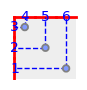

([1, 2, 3], [1, 3, 2])


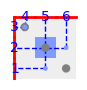

([1, 2, 3], [2, 1, 3])


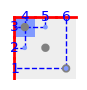

([1, 2, 3], [2, 3, 1])


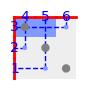

([1, 2, 3], [3, 1, 2])


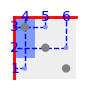

([1, 2, 3], [3, 2, 1])


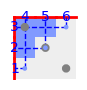

([2, 1, 3], [2, 1, 3])


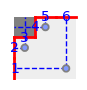

([2, 1, 3], [2, 3, 1])


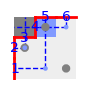

([2, 1, 3], [3, 1, 2])


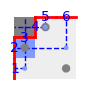

([2, 1, 3], [3, 2, 1])


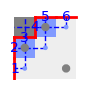

([2, 3, 1], [2, 3, 1])


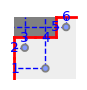

([2, 3, 1], [3, 2, 1])


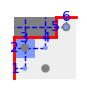

([3, 1, 2], [3, 1, 2])


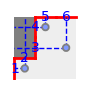

([3, 1, 2], [3, 2, 1])


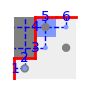

([3, 2, 1], [3, 2, 1])


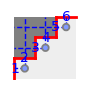

In [13]:
match_to_int_bij = {}
int_to_match_bij = {}
for u in dominant_elements(W):
    for v in u.bruhat_greater():
        #print(u,v)
        diag, matching = interval_diagram_w_lattice(u,v, colors[0])
        int_to_match_bij[(u,v)] = matching
        match_to_int_bij[Permutation(matching)] = (u,v)
        #if u == [2,1,3,4]:
        print((u,v))
        show(diag, figsize=[1,1])
#int_to_match_bij
#match_to_int_bij

In [14]:
#Fact check: make sure all (2n-1)!! matchings are there by comparing with the matchings we obtain from K_n graph
#To make sure we are encoding the matchings correctly, convert matching to involutions (cycle notation)
K=graphs.CompleteGraph(2*n)
match_from_K = all_perfect_matchings_graph(K)
len(match_from_K) == (2*n-1).multifactorial(2)

True

In [15]:
#match in Cylce Notaiton = converting regular shmegular matchings into cycle notation 
match_in_CN = [Permutation(match) for match in list(int_to_match_bij.values())]
all(Permutation(m) in match_in_CN for m in match_from_K)

True

# Translated Bruhat Intevals

In [14]:
#saving diagrams
i=0
for (u,v) in list(bruhat_to_class.keys()):
    g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)

NameError: name 'bruhat_to_class' is not defined

In [86]:
shifted_intervals = [];
pairs_grouped_by_interval = {}
bruhat_to_class_presort = {}

def shifted_interval (u, v): 
    W = u.parent();
    interval = set()
    for x in W.bruhat_interval(u, W(v)):
        interval.add((u^(-1)).left_action_product(x)) 
    return frozenset(interval)

for u in dominant_elements(W): 
    for v in u.bruhat_greater():
        interval = shifted_interval(u,v)

        if interval in shifted_intervals:
            i = shifted_intervals.index(interval)
        else:
            i = len(shifted_intervals) 
            pairs_grouped_by_interval[i] = [] 
            shifted_intervals.append(frozenset(interval))
            
        pairs_grouped_by_interval[i].append((u,v)) 
        bruhat_to_class_presort[(u,v)] = i
        
bruhat_to_class = dict(sorted(bruhat_to_class_presort.items(), key=lambda item: item[1]))

##Print outs of interval diagrams of translated (u,v)
# c=0

# for i in pairs_grouped_by_interval:
#     if i > 0:
#         print(shifted_intervals[i])
#         for (u, v) in pairs_grouped_by_interval[i]:
#             show(interval_diagram(u, v, colors[c % 8]), figsize=[1,1]) 
#         c=c+1
#         print("---")

In [89]:
#How do the matchings of these look like?
#Bruhat interval, Translated Class, matching, diagram
rows = []
rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram'])
i=0
for (u,v) in list(bruhat_to_class.keys()):
    g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
    rows.append([str(i+1), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>"])
    i+=1

table(rows, header_row=True, frame=True)

No.,Bruhat interval,Translated Class,Matching,Diagram
1,"\(\left([1, 2, 3], [1, 2, 3]\right)\)",\(0\),"\(\left[\left(3, 4\right), \left(2, 5\right), \left(1, 6\right)\right]\)",
2,"\(\left([2, 1, 3], [2, 1, 3]\right)\)",\(0\),"\(\left[\left(2, 3\right), \left(4, 5\right), \left(1, 6\right)\right]\)",
3,"\(\left([2, 3, 1], [2, 3, 1]\right)\)",\(0\),"\(\left[\left(2, 3\right), \left(1, 4\right), \left(5, 6\right)\right]\)",
4,"\(\left([3, 1, 2], [3, 1, 2]\right)\)",\(0\),"\(\left[\left(1, 2\right), \left(4, 5\right), \left(3, 6\right)\right]\)",
5,"\(\left([3, 2, 1], [3, 2, 1]\right)\)",\(0\),"\(\left[\left(1, 2\right), \left(3, 4\right), \left(5, 6\right)\right]\)",
6,"\(\left([1, 2, 3], [1, 3, 2]\right)\)",\(1\),"\(\left[\left(3, 4\right), \left(1, 5\right), \left(2, 6\right)\right]\)",
7,"\(\left([2, 1, 3], [2, 3, 1]\right)\)",\(1\),"\(\left[\left(2, 3\right), \left(1, 5\right), \left(4, 6\right)\right]\)",
8,"\(\left([3, 1, 2], [3, 2, 1]\right)\)",\(1\),"\(\left[\left(1, 2\right), \left(3, 5\right), \left(4, 6\right)\right]\)",
9,"\(\left([1, 2, 3], [2, 1, 3]\right)\)",\(2\),"\(\left[\left(2, 4\right), \left(3, 5\right), \left(1, 6\right)\right]\)",
10,"\(\left([2, 3, 1], [3, 2, 1]\right)\)",\(2\),"\(\left[\left(1, 3\right), \left(2, 4\right), \left(5, 6\right)\right]\)",


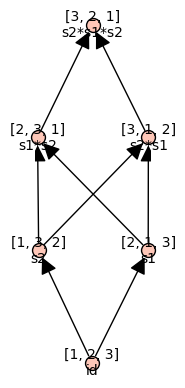

In [88]:
P = W.bruhat_poset()

labels = {}
for w in W:
    # one-line permutation string, e.g. '213'
    one_line = Permutation(w)
    # reduced_word() returns a list like [1,2,1] (Sage Integers); convert to 's1*s2*s1'
    rw = w.reduced_word()
    rw_str = "*".join("s{}".format(int(i)) for i in rw) if rw else "id"
    # include newline so label shows two lines (depends on renderer)
    labels[w] = "{}\n{}".format(one_line, rw_str)

P.show(element_labels=labels, figsize=[4,4], vertex_size=100, fontsize=10)

## Sidequest: what does rotating a matching corresponding to a bruhat interval do to that interval?

In [362]:
 #Plan: take a matching, convert it to a cycle notation permutation, conjugate by a shifting permutation (long cycle)
#Then print out the corresponding bruhat interval

In [363]:
def graphics_to_img_shifted(g,i, width=60, height=60):
    """
    Convert a Sage Graphics object into an HTML <img> tag.
    """
    return g.save(str(i)+"shifted" + ".png", dpi=100)

In [18]:
c = Permutation([tuple(range(1, 2*n + 1))])
k=1
rows = []
rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram', 
             'Shifted Matching', 'Corresponding interval', 'Corresponding class'])
i=0
for (u,v) in list(bruhat_to_class.keys()):
    shifted = ((c^k).inverse()* Permutation(int_to_match_bij[(u,v)])*(c^k))
    #g_shifted = graphics_to_img_shifted(draw_perfect_matching(shifted, n),i)
    #g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
    rows.append([str(i), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>", 
                 shifted.to_cycles(), match_to_int_bij[shifted], bruhat_to_class[match_to_int_bij[shifted]]])
    i+=1

table(rows, header_row=True, frame=True);

In [22]:
# c = Permutation([tuple(range(1, 2*n + 1))])
# k=1
# rows = []
# rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram', 
#              'Shifted Matching', 'Corresponding interval', 'Corresponding class'])

# for (u,v) in list(bruhat_to_class)[68:71]:
#     shifted = ((c^k).inverse()* Permutation(int_to_match_bij[(u,v)])*(c^k))
#     #g_shifted = graphics_to_img_shifted(draw_perfect_matching(shifted, n),i)
#     g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
#     rows.append([str(i), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>", 
#                  shifted.to_cycles(), match_to_int_bij[shifted], bruhat_to_class[match_to_int_bij[shifted]]])
    

# table(rows, header_row=True, frame=True)

In [24]:
c = Permutation([tuple(range(1, 2*n + 1))])
k=1
rows = []
rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram', 
             'Shifted Matching', 'Corresponding interval', 'Corresponding class'])

for (u,v) in list(bruhat_to_class)[68:71]:
    shifted = ((c^k).inverse()* Permutation(int_to_match_bij[(u,v)])*(c^k))
    #g_shifted = graphics_to_img_shifted(draw_perfect_matching(shifted, n),i)
    g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
    rows.append([str(i), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>", 
                 shifted.to_cycles(), match_to_int_bij[shifted], bruhat_to_class[match_to_int_bij[shifted]]])
    

table(rows, header_row=True, frame=True);

In [25]:
# Full matchings on a circular diagram (Sage/Python)
# --------------------------------------------------
# Vertices 1..2n on a circle in clockwise order.
# Extra points sit just clockwise of each odd vertex: positions 1.5, 3.5, ..., (2n-1)+0.5.
# A perfect matching M is "full" iff for every pair of extra points p<q,
# the chord (p,q) crosses at least one edge of M.

from itertools import combinations

def all_perfect_matchings(labels):
    """
    Generate all perfect matchings on 'labels' (an even-sized iterable of ints).
    Each matching is a tuple of 2-tuples (i,j) with i<j, sorted by first then second.
    """
    labels = tuple(sorted(labels))
    if not labels:
        yield tuple()
        return
    a = labels[0]
    for b in labels[1:]:
        pair = (a, b)
        rest = tuple(x for x in labels if x not in pair)
        for sub in all_perfect_matchings(rest):
            M = tuple(sorted(((min(x,y), max(x,y)) for (x,y) in (sub + (pair,))), key=lambda e:(e[0],e[1])))
            yield M

def chord_crosses(a, b, c, d):
    """
    Return True iff chords (a,b) and (c,d) cross when points lie on a circle
    with cyclic order labeled by their numeric values and chords drawn as straight segments in the convex polygon.
    Assumes all endpoints are distinct and a<b, c<d (works with non-integers too).
    Crossing condition (convex n-gon): a<c<b<d or c<a<d<b.
    """
    if a > b: a, b = b, a
    if c > d: c, d = d, c
    return (a < c < b < d) or (c < a < d < b)

def is_full_matching(M, n):
    """
    Check if perfect matching M on {1..2n} is 'full' given extra points at odd+.5.
    For every pair of extra points p<q among {1.5, 3.5, ..., (2n-1)+0.5},
    require that the chord (p,q) crosses at least one matching edge in M.
    """
    extras = [k - 0.5 for k in range(1, 2*n, 2)]  # 1.5, 3.5, ..., (2n-1)+0.5
    for p, q in combinations(extras, 2):
        # Does (p,q) cross at least one matching edge?
        crosses_any = any(chord_crosses(p, q, i, j) for (i, j) in M)
        if not crosses_any:
            return False
    return True

def full_matchings(n):
    """
    Enumerate all 'full' perfect matchings for size n.
    Returns a list of matchings; each matching is a tuple of pairs (i,j) with i<j.
    """
    labels = range(1, 2*n + 1)
    out = []
    for M in all_perfect_matchings(labels):
        if is_full_matching(M, n):
            out.append(M)
    return out

def pretty_matching(M):
    return "{" + ", ".join(f"({i},{j})" for (i,j) in M) + "}"

# -------------------------
# Demo / Example for n = 3:
# -------------------------

In [454]:
c = Permutation([tuple(range(1, 2*n + 1))])
k=1
rows = []
rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram', 
             'Shifted Matching', 'Corresponding interval', 'Corresponding class'])

for (u,v) in list(bruhat_to_class)[68:71]:
    shifted = ((c^k).inverse()* Permutation(int_to_match_bij[(u,v)])*(c^k))
    #g_shifted = graphics_to_img_shifted(draw_perfect_matching(shifted, n),i)
    g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
    rows.append([str(i), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>", 
                 shifted.to_cycles(), match_to_int_bij[shifted], bruhat_to_class[match_to_int_bij[shifted]]])
    

table(rows, header_row=True, frame=True)

No.,Bruhat interval,Translated Class,Matching,Diagram,Shifted Matching,Corresponding interval,Corresponding class
0,"\(\left([1, 2, 3, 4], [4, 3, 2, 1]\right)\)",\(23\),"\(\left[\left(1, 5\right), \left(2, 6\right), \left(3, 7\right), \left(4, 8\right)\right]\)",,"\(\left[\left(1, 5\right), \left(2, 6\right), \left(3, 7\right), \left(4, 8\right)\right]\)","\(\left([1, 2, 3, 4], [4, 3, 2, 1]\right)\)",\(23\)
0,"\(\left([2, 1, 3, 4], [2, 3, 1, 4]\right)\)",\(24\),"\(\left[\left(3, 4\right), \left(2, 6\right), \left(5, 7\right), \left(1, 8\right)\right]\)",,"\(\left[\left(1, 2\right), \left(3, 7\right), \left(4, 5\right), \left(6, 8\right)\right]\)","\(\left([4, 2, 1, 3], [4, 2, 3, 1]\right)\)",\(24\)
0,"\(\left([4, 2, 1, 3], [4, 2, 3, 1]\right)\)",\(24\),"\(\left[\left(1, 2\right), \left(4, 5\right), \left(3, 7\right), \left(6, 8\right)\right]\)",,"\(\left[\left(1, 7\right), \left(2, 3\right), \left(4, 8\right), \left(5, 6\right)\right]\)","\(\left([3, 1, 2, 4], [3, 1, 4, 2]\right)\)",\(42\)


In [422]:
n = 4
F = full_matchings(n)
print(f"n={n}: found {len(F)} full matching(s).")
for M in F:
    print(pretty_matching(M))

n=4: found 52 full matching(s).
{(1,3), (2,5), (4,7), (6,8)}
{(1,3), (2,5), (4,8), (6,7)}
{(1,3), (2,6), (4,7), (5,8)}
{(1,3), (2,6), (4,8), (5,7)}
{(1,3), (2,7), (4,5), (6,8)}
{(1,3), (2,7), (4,6), (5,8)}
{(1,3), (2,8), (4,5), (6,7)}
{(1,3), (2,8), (4,6), (5,7)}
{(1,4), (2,5), (3,7), (6,8)}
{(1,4), (2,5), (3,8), (6,7)}
{(1,4), (2,6), (3,7), (5,8)}
{(1,4), (2,6), (3,8), (5,7)}
{(1,4), (2,7), (3,5), (6,8)}
{(1,4), (2,7), (3,6), (5,8)}
{(1,4), (2,8), (3,5), (6,7)}
{(1,4), (2,8), (3,6), (5,7)}
{(1,5), (2,3), (4,7), (6,8)}
{(1,5), (2,3), (4,8), (6,7)}
{(1,5), (2,4), (3,7), (6,8)}
{(1,5), (2,4), (3,8), (6,7)}
{(1,5), (2,6), (3,7), (4,8)}
{(1,5), (2,6), (3,8), (4,7)}
{(1,5), (2,7), (3,6), (4,8)}
{(1,5), (2,7), (3,8), (4,6)}
{(1,5), (2,8), (3,6), (4,7)}
{(1,5), (2,8), (3,7), (4,6)}
{(1,6), (2,3), (4,7), (5,8)}
{(1,6), (2,3), (4,8), (5,7)}
{(1,6), (2,4), (3,7), (5,8)}
{(1,6), (2,4), (3,8), (5,7)}
{(1,6), (2,5), (3,7), (4,8)}
{(1,6), (2,5), (3,8), (4,7)}
{(1,6), (2,7), (3,5), (4,8)}
{(1,6), (2,

In [423]:
for M in F:
    corr_int = match_to_int_bij[Permutation(M)]
    print(bruhat_to_class[corr_int])


51
46
49
48
37
47
1
7
41
5
35
34
40
33
4
32
50
42
39
3
23
22
21
19
20
18
45
44
31
30
17
16
11
5
10
4
36
43
38
29
15
13
9
3
0
6
2
28
14
12
8
2


In [447]:
list(bruhat_to_class)[70:]

[([4, 2, 1, 3], [4, 2, 3, 1]),
 ([2, 1, 3, 4], [2, 3, 4, 1]),
 ([2, 1, 3, 4], [2, 4, 1, 3]),
 ([2, 1, 3, 4], [2, 4, 3, 1]),
 ([2, 1, 3, 4], [3, 2, 1, 4]),
 ([4, 2, 1, 3], [4, 3, 2, 1]),
 ([2, 1, 3, 4], [3, 2, 4, 1]),
 ([2, 1, 3, 4], [3, 4, 1, 2]),
 ([2, 1, 3, 4], [3, 4, 2, 1]),
 ([2, 1, 3, 4], [4, 2, 1, 3]),
 ([2, 1, 3, 4], [4, 2, 3, 1]),
 ([2, 1, 3, 4], [4, 3, 1, 2]),
 ([2, 1, 3, 4], [4, 3, 2, 1]),
 ([2, 3, 1, 4], [2, 3, 4, 1]),
 ([3, 2, 1, 4], [3, 2, 4, 1]),
 ([2, 3, 1, 4], [2, 4, 3, 1]),
 ([3, 2, 1, 4], [4, 2, 3, 1]),
 ([2, 3, 1, 4], [3, 2, 4, 1]),
 ([2, 3, 1, 4], [3, 4, 2, 1]),
 ([2, 3, 1, 4], [4, 2, 3, 1]),
 ([2, 3, 1, 4], [4, 3, 2, 1]),
 ([3, 1, 2, 4], [3, 1, 4, 2]),
 ([3, 2, 1, 4], [3, 4, 1, 2]),
 ([3, 2, 4, 1], [3, 4, 2, 1]),
 ([3, 1, 2, 4], [3, 2, 4, 1]),
 ([3, 1, 2, 4], [3, 4, 1, 2]),
 ([3, 1, 2, 4], [3, 4, 2, 1]),
 ([3, 1, 2, 4], [4, 1, 3, 2]),
 ([3, 2, 1, 4], [4, 3, 1, 2]),
 ([3, 2, 4, 1], [4, 3, 2, 1]),
 ([3, 1, 2, 4], [4, 2, 3, 1]),
 ([3, 1, 2, 4], [4, 3, 1, 2]),
 ([3, 1,

In [438]:
bruhat_to_class[list(bruhat_to_class)[70]]

24

In [403]:
for M in F:
    print(

[((1, 3), (2, 5), (4, 6)),
 ((1, 3), (2, 6), (4, 5)),
 ((1, 4), (2, 5), (3, 6)),
 ((1, 4), (2, 6), (3, 5)),
 ((1, 5), (2, 3), (4, 6)),
 ((1, 5), (2, 4), (3, 6)),
 ((1, 6), (2, 3), (4, 5)),
 ((1, 6), (2, 4), (3, 5))]

In [350]:
list(generate_perfect_matchings(list(range(1,7))))

[[(1, 2), (3, 4), (5, 6)],
 [(1, 2), (3, 5), (4, 6)],
 [(1, 2), (3, 6), (4, 5)],
 [(1, 3), (2, 4), (5, 6)],
 [(1, 3), (2, 5), (4, 6)],
 [(1, 3), (2, 6), (4, 5)],
 [(1, 4), (2, 3), (5, 6)],
 [(1, 4), (2, 5), (3, 6)],
 [(1, 4), (2, 6), (3, 5)],
 [(1, 5), (2, 3), (4, 6)],
 [(1, 5), (2, 4), (3, 6)],
 [(1, 5), (2, 6), (3, 4)],
 [(1, 6), (2, 3), (4, 5)],
 [(1, 6), (2, 4), (3, 5)],
 [(1, 6), (2, 5), (3, 4)]]

# New poset & interval - Middle order

In [80]:
def inversion_sequence_by_value(w):
    n = len(w)
    winv = ~w
    return vector([sum(1 for j in range(1, i) if winv(j) > winv(i)) for i in range(1, n+1)])


def build_inversion_poset(n):
    perms = list(Permutations(n))
    cover_relations = []
    inv_seqs = {p: inversion_sequence_by_value(p) for p in perms}
    for v in perms:
        for w in perms:
            if v == w:
                continue
            diff = inv_seqs[w] - inv_seqs[v]
            if all(d in (0,1) for d in diff) and sum(diff) == 1:
                cover_relations.append((v, w))

    return Poset((perms, cover_relations), cover_relations=True)

def find_boolean_intervals(G):
    """
    Given a Poset P, return a list of intervals [x, y] that are Boolean lattices. 
    Theorem 1.9: An interval [v,w] is Booelean iff for I(v) = (x1,...,xn) and I(w) = (y1,...,yn), yi in {xi,xi +1} for all i
    """

    boolean_intervals = []
    inv_seqs = {p: inversion_sequence_by_value(p) for p in list(G)}
    
    for v in list(G):
        middle_greater = [w for w in list(G) if G.is_lequal(v,w)]
        for w in middle_greater:
            diff = inv_seqs[w] - inv_seqs[v]
            if all(i in (0,1) for i in diff):
                boolean_intervals.append((v,w))
    return boolean_intervals

In [84]:
G = build_inversion_poset(n)
G.plot(vertex_size=300)
boolean_int = find_boolean_intervals(G)



# Middle Order

[1, 2, 3] [1, 2, 3]
([1, 2, 3], [1, 2, 3])


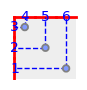

[1, 2, 3] [1, 3, 2]
([1, 2, 3], [1, 3, 2])


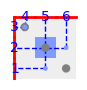

[1, 2, 3] [2, 1, 3]
([1, 2, 3], [2, 1, 3])


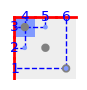

[1, 2, 3] [2, 3, 1]
([1, 2, 3], [2, 3, 1])


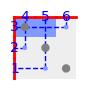

[1, 3, 2] [1, 3, 2]


AssertionError: u is not dominant

In [85]:
match_to_int_bij_mid = {}
int_to_match_bij_mid = {}
for (u,v) in boolean_int:
        print(u,v)
        diag, matching = interval_diagram_w_lattice(u,v, colors[0])
        int_to_match_bij_mid[(u,v)] = matching
        match_to_int_bij_mid[Permutation(matching)] = (u,v)
        #if u == [2,1,3,4]:
        print((u,v))
        show(diag, figsize=[1,1])
#int_to_match_bij
#match_to_int_bij

24
True
0
6


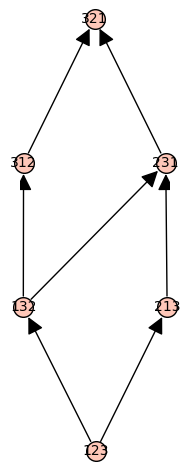

In [91]:
# SageMath code

def inversion_sequence_from_perm(perm):
    """
    perm: a Sage permutation object (values 1..n)
    returns tuple (x1,...,xn) where xi counts how many j<i occur to the right of i (in value-sense)
    """
    n = len(perm)
    pos = [0]*(n+1)
    # positions by VALUE: pos[value] = index (0-based)
    for idx, v in enumerate(perm):
        pos[v] = idx
    seq = []
    for i in range(1, n+1):
        pi = pos[i]
        c = sum(1 for j in range(1, i) if pos[j] > pi)
        seq.append(c)
    return tuple(seq)

def middle_order_poset(n):
    """
    Return the middle-order poset P_n on permutations of size n.
    Elements are Sage permutations; order defined by coordinatewise ≤ on inversion sequences.
    """
    from sage.combinat.permutation import Permutations
    perms = list(Permutations(n))
    invseq = {p: inversion_sequence_from_perm(p) for p in perms}

    def leq(p, q):
        a, b = invseq[p], invseq[q]
        return all(x <= y for x, y in zip(a, b))

    P = Poset((perms, leq))
    # optional: a rank function = total number of inversions (sum of the inversion-sequence entries)
    P._rank_function = lambda p: sum(invseq[p])  # graded; equals classical inversion number
    return P

# --- demo / usage ---
P3 = middle_order_poset(3)
print(P4.cardinality())      # should be 24
print(P4.is_lattice())       # True (finite distributive lattice)
print(P4.rank_function()(Permutations(4)([1,2,3,4])))  # 0
print(P4.rank_function()(Permutations(4)([4,3,2,1])))  # 6

# plot (labels as one-line notation)
lab = {p: ''.join(map(str, list(p))) for p in P3.list()}
G = P3.plot(element_labels=lab)
G.show()  # or save: G.save('P4_middle_order.png')
